# [Students] Shopee Code League - Logistics
Hendrik Lesmana
### Task
Identify all the orders that are considered late depending on the Service Level Agreements (SLA) with our Logistics Provider.

For the purpose of this question, assume that all deliveries are considered successful by the second attempt.


### Basic Concepts
- Each orderid represents a distinct transaction on Shopee.
- SLA can vary across each route (A route is defined as Seller’s Location to Buyer’s Location) - Refer to SLA_matrix.xlsx(picture below)
- Pick Up Time is defined as the time when the 3PL picks up the parcel and begins to process for delivery. It marks the start of the SLA calculation.
- Delivery Attempt is defined as an attempt made by the 3PL to deliver the parcel to the customer. It may or may not be delivered successfully. In the case when it is unsuccessful, a 2nd attempt will be made. A parcel that has no 2nd attempt is deemed to have been successfully delivered on the 1st attempt.
- All time formats are stored in epoch time based on Local Time (GMT+8).
- Only consider the date when determining if the order is late; ignore the time.
- Working Days are defined as Mon - Sat, Excluding Public Holidays.
- SLA calculation begins from the next day after pickup (Day 0 = Day of Pickup; Day 1 = Next Day after Pickup)

2nd Attempt must be no later than 3 working days after the 1st Attempt, regardless of origin to destination route (Day 0 = Day of 1st Attempt; Day 1 = Next Day after 1st Attempt).

Only consider the date when determining if the order is late; ignore the time.

Assume the following Public Holidays: 

- 2020-03-08 (Sunday);
- 2020-03-25 (Wednesday);
- 2020-03-30 (Monday);
- 2020-03-31 (Tuesday)

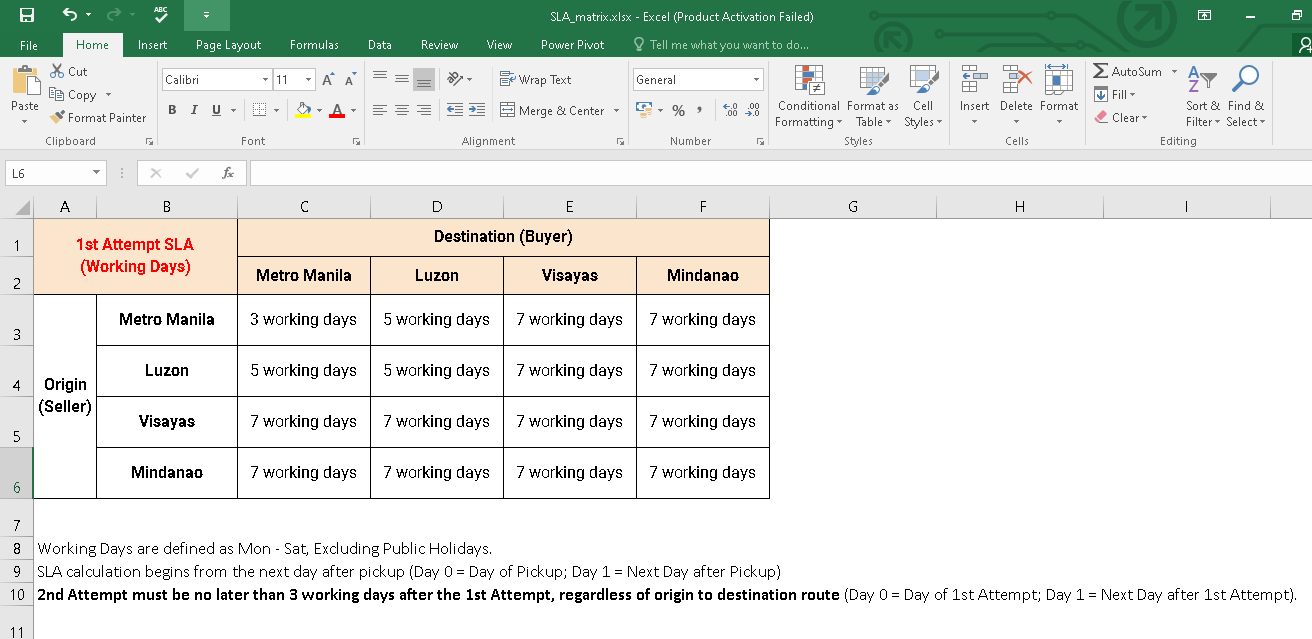

In [1]:
#import libaries needed to solve the problem
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/delivery_orders_march.csv')

In [3]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,1583138397,1.583385e+09,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,1583309968,1.583463e+09,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,1583306434,1.583460e+09,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,1583419016,1.583556e+09,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,1583318305,1.583480e+09,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176313 entries, 0 to 3176312
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   orderid              int64  
 1   pick                 int64  
 2   1st_deliver_attempt  float64
 3   2nd_deliver_attempt  float64
 4   buyeraddress         object 
 5   selleraddress        object 
dtypes: float64(2), int64(2), object(2)
memory usage: 121.2+ MB


The dataset consis of:
- 6 column
- 3,176,313 rows

pick, 1st_deliver_attempt, 2nd_deliver_attempt are representating a timeframe as the number of seconds(Unix Time)

In [5]:
#based on "Basic Concepts", all time formats are stored in epoch time based on Local Time (GMT+8).
data[['pick','1st_deliver_attempt','2nd_deliver_attempt']] += 8*60*60

#after convert the time into GMT+8, change the unix time to date
data['pick'] = pd.to_datetime(data['pick'],unit='s').dt.date
data['1st_deliver_attempt'] = pd.to_datetime(data['1st_deliver_attempt'],unit='s').dt.date

#If there're Nan values, the value can't be proceed(because unix time is a timeframe as the "number" of seconds)
data['2nd_deliver_attempt'] = data['2nd_deliver_attempt'].replace(np.nan,0)
data['2nd_deliver_attempt'] = pd.to_datetime(data['2nd_deliver_attempt'],unit='s').dt.date

In [6]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,1970-01-01,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,2020-03-04,2020-03-06,2020-03-10,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,2020-03-04,2020-03-06,1970-01-01,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,2020-03-05,2020-03-07,1970-01-01,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,2020-03-04,2020-03-06,1970-01-01,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...


In [7]:
#lambda is a function to do a small task
#split()[-1] means get the last value of the data['buyeraddress/selleraddress']
#-1 repesent the last value of the data, -2 the second last value
data['buyeraddress'] = data['buyeraddress'].apply(lambda x: x.split()[-1]).str.lower()
data['selleraddress'] = data['selleraddress'].apply(lambda x: x.split()[-1]).str.lower()

In [8]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila


In [10]:
#The purpose if this step is to make a SLA as data['days] in the DataFrame
temp = []
for i,j in data[['buyeraddress','selleraddress']].itertuples(index=False):
    if (i=='manila' and j=='manila'):
        temp.append(3)
    elif ((i=='manila' and j=='luzon') or (i=='luzon' and j=='manila') or (i=='luzon' and j=='luzon')):
        temp.append(5)
    else:
        temp.append(7)

data['days'] = temp

Based on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html

itertuples is used when we want to read and compare row by row

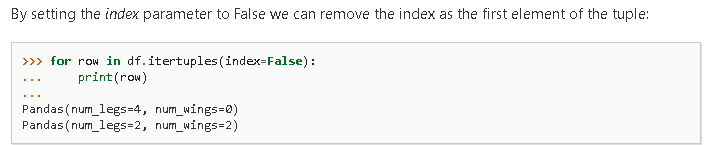

itertuples(index=False) is used to show data without index

If itertuples() didn't use (index=False) to a big data with more than 3 million rows, then there will be an error which is:
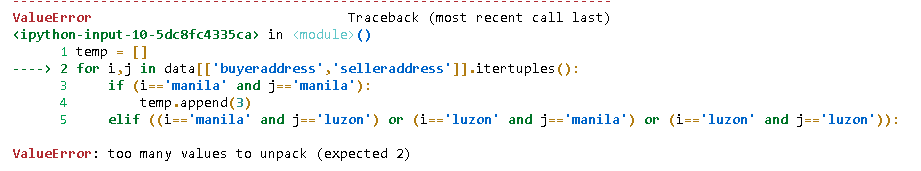

The error causes when you try to unpack too many values into variables without assigning enough variables

In [11]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,3
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,3
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,3
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,5


In [12]:
holiday = ['2020-03-08','2020-03-25','2020-03-30','2020-03-31']
data['1st_pick'] = np.busday_count(data['pick'],data['1st_deliver_attempt'],weekmask='1111110',holidays=holiday)
data['2nd_pick'] = np.busday_count(data['1st_deliver_attempt'],data['2nd_deliver_attempt'],weekmask='1111110',holidays=holiday)

Based on https://numpy.org/doc/stable/reference/generated/numpy.busday_count.html#:~:text=Counts%20the%20number%20of%20valid,including%20the%20day%20of%20enddates.&text=A%20busdaycalendar%20object%20which%20specifies%20the%20valid%20days.

numpy.busday_count is uses to counts the number of valid days between begindates and enddates, not including the day of enddates.

The formula is "numpy.busday_count(begindates, enddates, weekmask='1111100', holidays=[], busdaycal=None, out=None)"
- The formula starts to get the difference value between begin dates and end dates
- The implementation is based on a “weekmask” containing 7 Boolean flags to indicate valid days; custom weekmasks are possible that specify other sets of valid days.
- holidays shows dates as invalid days

In [13]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days,1st_pick,2nd_pick
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,3,-15708
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,3,2,3
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,3,2,-15709
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,3,2,-15710
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,5,2,-15709


In [14]:
#Basic Concepts: 2nd Attempt must be no later than 3 working days after the 1st Attempt, regardless of origin to destination route (Day 0 = Day of 1st Attempt; Day 1 = Next Day after 1st Attempt).
data['is_late'] = (data['1st_pick'] > data['days']) | (data['2nd_pick'] > 3)

In [15]:
data.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days,1st_pick,2nd_pick,is_late
0,2215676524,2020-03-02,2020-03-05,1970-01-01,manila,manila,3,3,-15708,False
1,2219624609,2020-03-04,2020-03-06,2020-03-10,manila,manila,3,2,3,False
2,2220979489,2020-03-04,2020-03-06,1970-01-01,manila,manila,3,2,-15709,False
3,2221066352,2020-03-05,2020-03-07,1970-01-01,manila,manila,3,2,-15710,False
4,2222478803,2020-03-04,2020-03-06,1970-01-01,luzon,manila,5,2,-15709,False


In [16]:
submission = pd.DataFrame({'orderid':data['orderid'], 'is_late':data['is_late'].apply(int)})

In [19]:
submission

,orderid,is_late
0,2215676524,0
1,2219624609,0
2,2220979489,0
3,2221066352,0
4,2222478803,0
...,...,...
3176308,31504087640510,0
3176309,31504147352227,0
3176310,31504462290482,0
3176311,31504851495943,0


- 1 considered late depending on the Service Level Agreements (SLA)
- 0 considered not late depending on the Service Level Agreements (SLA)